# Problem Statement:
## Agricultural Raw Material Analysis
You are tasked to analyze agricultural-raw-material-prices dataset over the years (EDA) 
1. Find the high-range and low-range raw materials according to their prices.
2. high and low % Change materials
3. Identify the range of prices changed over the years.
4. Map a correlation between them using a heatmap

In [187]:
import pandas as pd
import numpy as np
import seaborn as sns

In [188]:
df = pd.read_csv("agricultural_raw_material.csv")

# Understanding the data

In [189]:
df.head()

,Month,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
0,Apr-90,482.34,-,236,-,1.83,-,"1,071.63",-,161.20,...,312.36,-,0.84,-,120.66,-,218.76,-,829.29,-
1,May-90,447.26,-7.27%,234,-0.85%,1.89,3.28%,"1,057.18",-1.35%,172.86,...,350.12,12.09%,0.85,1.19%,124.28,3.00%,213.00,-2.63%,842.51,1.59%
2,Jun-90,440.99,-1.40%,216,-7.69%,1.99,5.29%,898.24,-15.03%,181.67,...,373.94,6.80%,0.85,0.00%,129.45,4.16%,200.00,-6.10%,831.35,-1.32%
3,Jul-90,418.44,-5.11%,205,-5.09%,2.01,1.01%,895.83,-0.27%,187.96,...,378.48,1.21%,0.86,1.18%,124.23,-4.03%,210.05,5.03%,798.83,-3.91%
4,Aug-90,418.44,0.00%,198,-3.41%,1.79,-10.95%,951.22,6.18%,186.13,...,364.60,-3.67%,0.88,2.33%,129.70,4.40%,208.30,-0.83%,818.74,2.49%


In [190]:
df.tail()

,Month,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
356,Dec-19,NaN,NaN,NaN,NaN,1.67,1.21%,NaN,NaN,272.80,...,500.37,-0.22%,1.66,7.79%,NaN,NaN,NaN,NaN,875.0,0.00%
357,Jan-20,NaN,NaN,NaN,NaN,1.74,4.19%,NaN,NaN,272.40,...,499.64,-0.15%,1.68,1.20%,NaN,NaN,NaN,NaN,875.0,0.00%
358,Feb-20,NaN,NaN,NaN,NaN,1.69,-2.87%,NaN,NaN,270.56,...,496.28,-0.67%,1.61,-4.17%,NaN,NaN,NaN,NaN,875.0,0.00%
359,Mar-20,NaN,NaN,NaN,NaN,1.49,-11.83%,NaN,NaN,276.93,...,507.96,2.35%,1.50,-6.83%,NaN,NaN,NaN,NaN,875.0,0.00%
360,Apr-20,NaN,NaN,NaN,NaN,1.40,-6.04%,NaN,NaN,276.24,...,506.68,-0.25%,1.33,-11.33%,NaN,NaN,NaN,NaN,NaN,NaN


In [191]:
df.dtypes

Month                            object
Coarse wool Price                object
Coarse wool price % Change       object
Copra Price                      object
Copra price % Change             object
Cotton Price                    float64
Cotton price % Change            object
Fine wool Price                  object
Fine wool price % Change         object
Hard log Price                  float64
Hard log price % Change          object
Hard sawnwood Price             float64
Hard sawnwood price % Change     object
Hide Price                      float64
Hide price % change              object
Plywood Price                   float64
Plywood price % Change           object
Rubber Price                    float64
Rubber price % Change            object
Softlog Price                   float64
Softlog price % Change           object
Soft sawnwood Price             float64
Soft sawnwood price % Change     object
Wood pulp Price                 float64
Wood pulp price % Change         object


In [192]:
# Modifying values to suit the numeric way to find max and minimum value
df['Coarse wool price % Change'].dropna().str.replace('%','').astype(int, errors = 'ignore').sort_values()

0          -
181    -0.04
87     -0.04
104    -0.05
206    -0.08
       ...  
272     8.36
82      8.40
262     8.75
149     9.22
261     9.77
Name: Coarse wool price % Change, Length: 327, dtype: object

In [193]:
df.shape

(361, 25)

In [194]:
df.describe()

,Cotton Price,Hard log Price,Hard sawnwood Price,Hide Price,Plywood Price,Rubber Price,Softlog Price,Soft sawnwood Price,Wood pulp Price
count,361.000000,361.000000,327.000000,327.000000,361.000000,361.000000,327.000000,327.000000,360.000000
mean,1.640000,251.034072,707.950367,78.566667,508.216122,1.656427,164.527462,291.061713,696.670889
std,0.513319,65.628406,144.563241,13.690623,89.274718,1.017086,25.596308,34.113959,161.156936
min,0.820000,133.280000,413.370000,28.590000,312.360000,0.490000,119.350000,183.610000,384.000000
25%,1.290000,197.960000,573.470000,69.495000,442.540000,0.860000,145.970000,277.590000,549.777500
50%,1.600000,253.010000,728.710000,77.250000,505.040000,1.440000,160.370000,294.960000,693.580000
75%,1.850000,282.970000,831.635000,86.000000,570.790000,2.060000,180.210000,310.865000,875.000000
max,5.060000,520.810000,973.600000,114.630000,751.810000,6.260000,259.970000,372.600000,966.490000


In [195]:
df.columns

Index(['Month', 'Coarse wool Price', 'Coarse wool price % Change',
       'Copra Price', 'Copra price % Change', 'Cotton Price',
       'Cotton price % Change', 'Fine wool Price', 'Fine wool price % Change',
       'Hard log Price', 'Hard log price % Change', 'Hard sawnwood Price',
       'Hard sawnwood price % Change', 'Hide Price', 'Hide price % change',
       'Plywood Price', 'Plywood price % Change', 'Rubber Price',
       'Rubber price % Change', 'Softlog Price', 'Softlog price % Change',
       'Soft sawnwood Price', 'Soft sawnwood price % Change',
       'Wood pulp Price', 'Wood pulp price % Change'],
      dtype='object')

In [196]:
raw_material_names = ['Coarse wool', 'Copra', 'Cotton', 'Fine wool', 'Hard log', 'Hard sawnwood', 'Hide', 'Plywood', 'Rubber', 'Softlog', 'Soft sawnwood', 'Wood pulp']
print(raw_material_names, len(raw_material_names))

['Coarse wool', 'Copra', 'Cotton', 'Fine wool', 'Hard log', 'Hard sawnwood', 'Hide', 'Plywood', 'Rubber', 'Softlog', 'Soft sawnwood', 'Wood pulp'] 12


In [197]:
months = list(np.array(df["Month"]))
months

['Apr-90',
 'May-90',
 'Jun-90',
 'Jul-90',
 'Aug-90',
 'Sep-90',
 'Oct-90',
 'Nov-90',
 'Dec-90',
 'Jan-91',
 'Feb-91',
 'Mar-91',
 'Apr-91',
 'May-91',
 'Jun-91',
 'Jul-91',
 'Aug-91',
 'Sep-91',
 'Oct-91',
 'Nov-91',
 'Dec-91',
 'Jan-92',
 'Feb-92',
 'Mar-92',
 'Apr-92',
 'May-92',
 'Jun-92',
 'Jul-92',
 'Aug-92',
 'Sep-92',
 'Oct-92',
 'Nov-92',
 'Dec-92',
 'Jan-93',
 'Feb-93',
 'Mar-93',
 'Apr-93',
 'May-93',
 'Jun-93',
 'Jul-93',
 'Aug-93',
 'Sep-93',
 'Oct-93',
 'Nov-93',
 'Dec-93',
 'Jan-94',
 'Feb-94',
 'Mar-94',
 'Apr-94',
 'May-94',
 'Jun-94',
 'Jul-94',
 'Aug-94',
 'Sep-94',
 'Oct-94',
 'Nov-94',
 'Dec-94',
 'Jan-95',
 'Feb-95',
 'Mar-95',
 'Apr-95',
 'May-95',
 'Jun-95',
 'Jul-95',
 'Aug-95',
 'Sep-95',
 'Oct-95',
 'Nov-95',
 'Dec-95',
 'Jan-96',
 'Feb-96',
 'Mar-96',
 'Apr-96',
 'May-96',
 'Jun-96',
 'Jul-96',
 'Aug-96',
 'Sep-96',
 'Oct-96',
 'Nov-96',
 'Dec-96',
 'Jan-97',
 'Feb-97',
 'Mar-97',
 'Apr-97',
 'May-97',
 'Jun-97',
 'Jul-97',
 'Aug-97',
 'Sep-97',
 'Oct-97',

In [198]:
df.nunique()
# for specific column
# data[{column_name}].unique()

Month                           361
Coarse wool Price               324
Coarse wool price % Change      293
Copra Price                     263
Copra price % Change            307
Cotton Price                    134
Cotton price % Change           296
Fine wool Price                 325
Fine wool price % Change        300
Hard log Price                  350
Hard log price % Change         325
Hard sawnwood Price             291
Hard sawnwood price % Change    257
Hide Price                      298
Hide price % change             277
Plywood Price                   349
Plywood price % Change          286
Rubber Price                    185
Rubber price % Change           302
Softlog Price                   316
Softlog price % Change          300
Soft sawnwood Price             316
Soft sawnwood price % Change    297
Wood pulp Price                 287
Wood pulp price % Change        259
dtype: int64

In [199]:
df.isnull().sum()

Month                            0
Coarse wool Price               34
Coarse wool price % Change      34
Copra Price                     22
Copra price % Change            22
Cotton Price                     0
Cotton price % Change            0
Fine wool Price                 34
Fine wool price % Change        34
Hard log Price                   0
Hard log price % Change          0
Hard sawnwood Price             34
Hard sawnwood price % Change    34
Hide Price                      34
Hide price % change             34
Plywood Price                    0
Plywood price % Change           0
Rubber Price                     0
Rubber price % Change            0
Softlog Price                   34
Softlog price % Change          34
Soft sawnwood Price             34
Soft sawnwood price % Change    34
Wood pulp Price                  1
Wood pulp price % Change         1
dtype: int64

In [200]:
fixed_df = pd.DataFrame()
for raw_material_name in raw_material_names:
    fixed_df[raw_material_name + ' Price']= pd.to_numeric(df[raw_material_name+ ' Price'].dropna().astype(str).str.replace(',',''))
    add_text = " price % Change"
    if raw_material_name=="Hide":
        add_text = ' price % change'
    fixed_df[raw_material_name + add_text] = pd.to_numeric(df[raw_material_name+ add_text].dropna().astype(str).str.replace('%',''),errors='coerce')
fixed_df

,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,Hard log price % Change,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
0,482.34,NaN,236.00,NaN,1.83,NaN,1071.63,NaN,161.20,NaN,...,312.36,NaN,0.84,NaN,120.66,NaN,218.76,NaN,829.29,NaN
1,447.26,-7.27,234.00,-0.85,1.89,3.28,1057.18,-1.35,172.86,7.23,...,350.12,12.09,0.85,1.19,124.28,3.00,213.00,-2.63,842.51,1.59
2,440.99,-1.40,216.00,-7.69,1.99,5.29,898.24,-15.03,181.67,5.10,...,373.94,6.80,0.85,0.00,129.45,4.16,200.00,-6.10,831.35,-1.32
3,418.44,-5.11,205.00,-5.09,2.01,1.01,895.83,-0.27,187.96,3.46,...,378.48,1.21,0.86,1.18,124.23,-4.03,210.05,5.03,798.83,-3.91
4,418.44,0.00,198.00,-3.41,1.79,-10.95,951.22,6.18,186.13,-0.97,...,364.60,-3.67,0.88,2.33,129.70,4.40,208.30,-0.83,818.74,2.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,1029.58,0.18,1146.25,-6.43,1.88,3.30,1368.14,6.06,263.45,1.88,...,483.23,1.88,2.71,5.86,157.58,-7.39,287.43,-7.73,875.00,0.00
323,1059.60,2.92,1016.00,-11.36,1.91,1.60,1454.83,6.34,263.48,0.01,...,483.27,0.01,2.35,-13.28,160.05,1.57,300.42,4.52,875.00,0.00
324,991.12,-6.46,1044.00,2.76,1.92,0.52,1404.98,-3.43,270.34,2.60,...,495.87,2.61,2.21,-5.96,159.84,-0.13,306.60,2.06,875.00,0.00
325,1019.95,2.91,1112.50,6.56,1.95,1.56,1433.47,2.03,265.28,-1.87,...,486.59,-1.87,2.10,-4.98,159.84,0.00,306.60,0.00,875.00,0.00


## 1. Find the high-range and low-range raw materials according to their prices.

In [201]:
def highrange_lowrange_material_price(raw_material_name):
    min_price = pd.to_numeric(df[raw_material_name+ ' Price'].dropna().astype(str).str.replace(',','')).min()
    max_price = pd.to_numeric(df[raw_material_name+ ' Price'].dropna().astype(str).str.replace(',','')).max()
    return min_price,max_price

In [202]:
min_prices = []
max_prices = []
ranges = []
for name in raw_material_names:
    min_price,max_price = highrange_lowrange_material_price(name)
    min_prices.append(min_price)
    max_prices.append(max_price)
    ranges.append(max_price-min_price)
    #print(f"{name}: \nMax Cost -> {max_price}\nMin Cost -> {min_price}\nRange -> {max_price-min_price}\n")
max_range_material = raw_material_names[np.argmax(np.array(ranges))]
min_range_material = raw_material_names[np.argmin(np.array(ranges))]
print(f"{max_range_material}: \nMax Range -> {highrange_lowrange_material_price(max_range_material)}")
print(f"Max Range: {max(ranges)} with Material: {max_range_material}\n")
print(f"{min_range_material}: \nMin Range -> {highrange_lowrange_material_price(min_range_material)}")
print(f"Min Range: {min(ranges)} with Material: {min_range_material}\n")

Fine wool: 
Max Range -> (417.47, 1865.44)
Max Range: 1447.97 with Material: Fine wool

Cotton: 
Min Range -> (0.82, 5.06)
Min Range: 4.239999999999999 with Material: Cotton



# 2. high and low % Change materials

In [203]:
min_price_change = pd.to_numeric(df[raw_material_names[0]+ ' price % Change'].dropna().astype(str).str.replace('%',''),errors='coerce').min()
print(min_price_change)

-22.25


In [204]:
def highrange_lowrange_material_price_changes(raw_material_name):
    add_text = " price % Change"
    if raw_material_name=="Hide":
        add_text = ' price % change'
    min_price_change = pd.to_numeric(df[raw_material_name+ add_text].dropna().astype(str).str.replace('%',''),errors='coerce').min()
    max_price_change = pd.to_numeric(df[raw_material_name+ add_text].dropna().astype(str).str.replace('%',''),errors='coerce').max()
    return min_price_change,max_price_change

In [205]:
highrange_lowrange_material_price_changes(raw_material_names[0])

(-22.25, 21.99)

In [206]:
min_prices_change = []
max_prices_change = []

for name in raw_material_names:
    min_price_change,max_price_change = highrange_lowrange_material_price_changes(name)
    min_prices_change.append(min_price_change)
    max_prices_change.append(max_price_change)
max_price_change_material = raw_material_names[np.argmax(np.array(max_prices_change))]
min_price_change_material = raw_material_names[np.argmin(np.array(min_prices_change))]
print(f"Max Price Change Material : {max_price_change_material} -> Price Change: {max(max_prices_change)} %" )
print(f"Min Price Change Material : {min_price_change_material} -> Price Change: {min(min_prices_change)} %" )

Max Price Change Material : Soft sawnwood -> Price Change: 65.24 %
Min Price Change Material : Hide -> Price Change: -42.14 %


# 3. Identify the range of prices changed over the years. 

In [207]:
def highrange_lowrange_material_price_changes_range(raw_material_name):
    min_price_change, max_price_change = highrange_lowrange_material_price_changes(raw_material_name)
    return max_price_change-min_price_change

In [208]:
ranges = []

for name in raw_material_names:
    range_val = highrange_lowrange_material_price_changes_range(name)
    ranges.append(range_val)
    print(f"Material: {name} -> Range of Price Changed: {range_val}\n")

Material: Coarse wool -> Range of Price Changed: 44.239999999999995

Material: Copra -> Range of Price Changed: 50.99

Material: Cotton -> Range of Price Changed: 45.86

Material: Fine wool -> Range of Price Changed: 59.910000000000004

Material: Hard log -> Range of Price Changed: 48.949999999999996

Material: Hard sawnwood -> Range of Price Changed: 34.2

Material: Hide -> Range of Price Changed: 71.38

Material: Plywood -> Range of Price Changed: 30.55

Material: Rubber -> Range of Price Changed: 56.33

Material: Softlog -> Range of Price Changed: 62.33

Material: Soft sawnwood -> Range of Price Changed: 106.85999999999999

Material: Wood pulp -> Range of Price Changed: 34.26



# 4. Map a correlation between them using a heatmap

In [209]:
price_change_over_years = pd.DataFrame()
price_change_over_years["Raw_material_name"] = raw_material_names
price_change_over_years["Range"] = ranges
price_change_over_years

,Raw_material_name,Range
0,Coarse wool,44.24
1,Copra,50.99
2,Cotton,45.86
3,Fine wool,59.91
4,Hard log,48.95
5,Hard sawnwood,34.20
6,Hide,71.38
7,Plywood,30.55
8,Rubber,56.33
9,Softlog,62.33


In [210]:
fixed_df = pd.DataFrame()
for raw_material_name in raw_material_names:
    fixed_df[raw_material_name + ' Price']= pd.to_numeric(df[raw_material_name+ ' Price'].dropna().astype(str).str.replace(',',''))
    add_text = " price % Change"
    if raw_material_name=="Hide":
        add_text = ' price % change'
    fixed_df[raw_material_name + add_text] = pd.to_numeric(df[raw_material_name+ add_text].dropna().astype(str).str.replace('%',''),errors='coerce')
fixed_df

,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,Hard log price % Change,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
0,482.34,NaN,236.00,NaN,1.83,NaN,1071.63,NaN,161.20,NaN,...,312.36,NaN,0.84,NaN,120.66,NaN,218.76,NaN,829.29,NaN
1,447.26,-7.27,234.00,-0.85,1.89,3.28,1057.18,-1.35,172.86,7.23,...,350.12,12.09,0.85,1.19,124.28,3.00,213.00,-2.63,842.51,1.59
2,440.99,-1.40,216.00,-7.69,1.99,5.29,898.24,-15.03,181.67,5.10,...,373.94,6.80,0.85,0.00,129.45,4.16,200.00,-6.10,831.35,-1.32
3,418.44,-5.11,205.00,-5.09,2.01,1.01,895.83,-0.27,187.96,3.46,...,378.48,1.21,0.86,1.18,124.23,-4.03,210.05,5.03,798.83,-3.91
4,418.44,0.00,198.00,-3.41,1.79,-10.95,951.22,6.18,186.13,-0.97,...,364.60,-3.67,0.88,2.33,129.70,4.40,208.30,-0.83,818.74,2.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,1029.58,0.18,1146.25,-6.43,1.88,3.30,1368.14,6.06,263.45,1.88,...,483.23,1.88,2.71,5.86,157.58,-7.39,287.43,-7.73,875.00,0.00
323,1059.60,2.92,1016.00,-11.36,1.91,1.60,1454.83,6.34,263.48,0.01,...,483.27,0.01,2.35,-13.28,160.05,1.57,300.42,4.52,875.00,0.00
324,991.12,-6.46,1044.00,2.76,1.92,0.52,1404.98,-3.43,270.34,2.60,...,495.87,2.61,2.21,-5.96,159.84,-0.13,306.60,2.06,875.00,0.00
325,1019.95,2.91,1112.50,6.56,1.95,1.56,1433.47,2.03,265.28,-1.87,...,486.59,-1.87,2.10,-4.98,159.84,0.00,306.60,0.00,875.00,0.00


In [211]:
def fix_df(df):
    fixed_df = pd.DataFrame()
    raw_material_names = ['Coarse wool', 'Copra', 'Cotton', 'Fine wool', 'Hard log', 'Hard sawnwood', 'Hide', 'Plywood', 'Rubber', 'Softlog', 'Soft sawnwood', 'Wood pulp']
    for raw_material_name in raw_material_names:
        print(raw_material_name+' ',end='$')
        fixed_df[raw_material_name + ' Price']= pd.to_numeric(df[raw_material_name+ ' Price'].dropna().astype(str).str.replace(',',''))
        add_text = " price % Change"
        if raw_material_name=="Hide":
            add_text = ' price % change'
        fixed_df[raw_material_name + add_text] = pd.to_numeric(df[raw_material_name+ add_text].dropna().astype(str).str.replace('%',''),errors='coerce')
    return fixed_df

In [212]:
correlation = fixed_df.corr()

<Axes: >

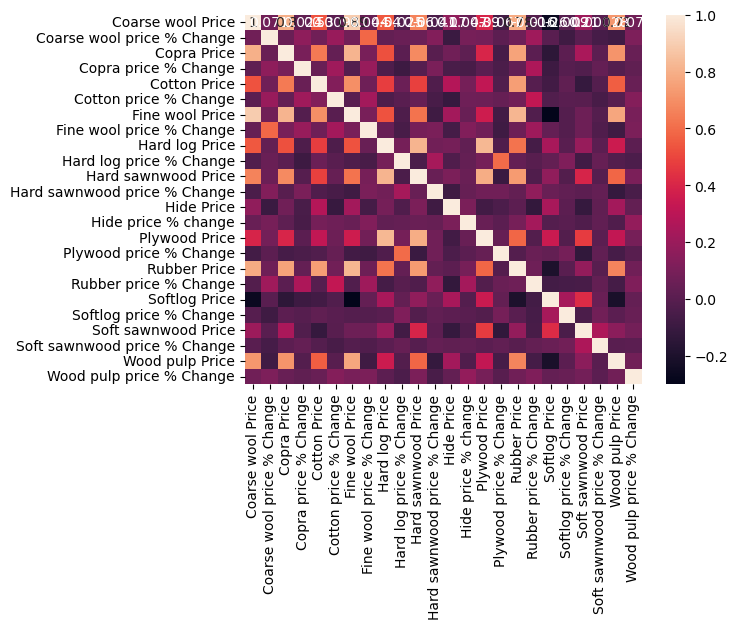

In [213]:
sns.heatmap(correlation, xticklabels = correlation.columns, yticklabels = correlation.columns, annot=True)